<a href="https://colab.research.google.com/github/AswinPrasad2001/Data-Science-Projects/blob/main/Airlines_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Import libraries


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## STEP 2: Load the dataset

In [3]:
af = pd.read_csv('/content/airlines_flights_data.csv')

In [4]:
af

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


STEP 3: Basic information

In [5]:
af.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
af.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [7]:
af.shape

(300153, 12)

In [8]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [10]:
af.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [13]:
af.dtypes

,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [14]:
af.columns.tolist()

['index',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

STEP 4: Check for missing values

In [12]:
af.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


No missing values — the dataset is clean in that sense.

### Step 5: Data Cleaning

In [17]:
# Drop unnecessary columns
af_cleaned = af.drop(columns=['index', 'flight'])

In [18]:
# Check duplicates
duplicates_count = af_cleaned.duplicated().sum()
af_cleaned = af_cleaned.drop_duplicates()

In [19]:
# Convert categorical columns to category dtype
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class']
for col in categorical_cols:
    af_cleaned[col] = af_cleaned[col].astype('category')

In [20]:
# Summary after cleaning
af_cleaned.shape

(297940, 10)

In [21]:
af_cleaned.dtypes

,0
airline,category
source_city,category
departure_time,category
stops,category
arrival_time,category
destination_city,category
class,category
duration,float64
days_left,int64
price,int64


In [23]:
duplicates_removed = duplicates_count
duplicates_removed

np.int64(2213)

Step 6: Exploratory Data Analysis (EDA)

In [24]:
# Set plot style
sns.set(style="whitegrid")

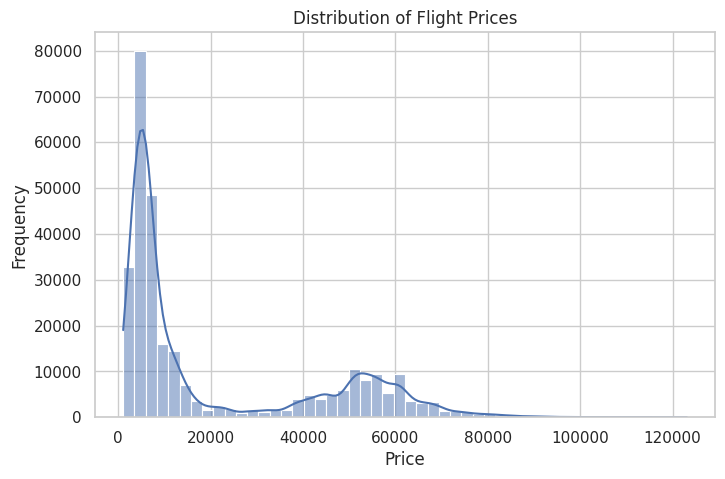

In [26]:
# 1. Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(af_cleaned['price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

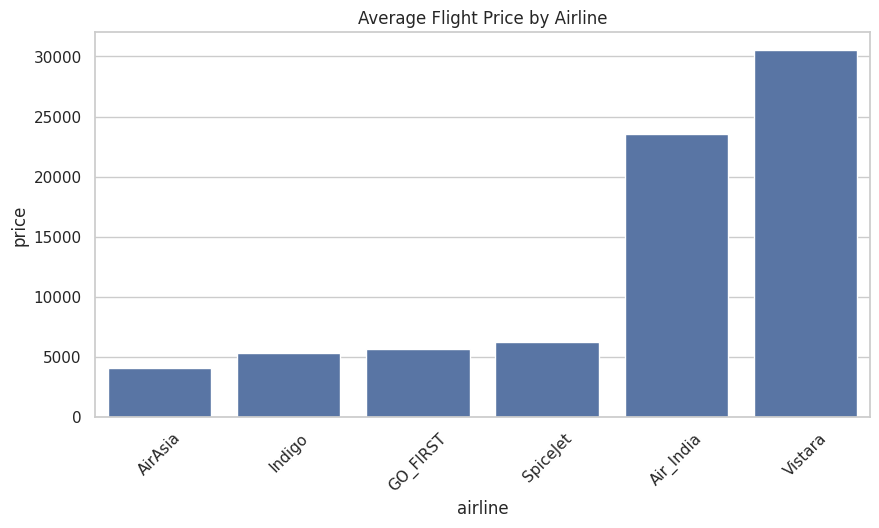

In [35]:
# 2. Average price by airline
plt.figure(figsize=(10, 5))
sns.barplot(
    data=af_cleaned,
    x='airline',
    y='price',
    errorbar=None,
    order=af_cleaned.groupby('airline', observed=False)['price']
                    .mean()
                    .sort_values()
                    .index
)
plt.title("Average Flight Price by Airline")
plt.xticks(rotation=45)
plt.show()



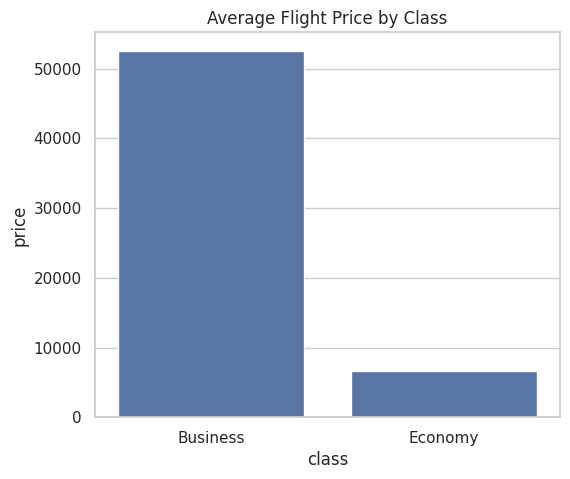

In [40]:
# 3. Average price by class
plt.figure(figsize=(6, 5))
sns.barplot(data=af_cleaned, x='class', y='price', errorbar=None)
plt.title("Average Flight Price by Class")
plt.show()

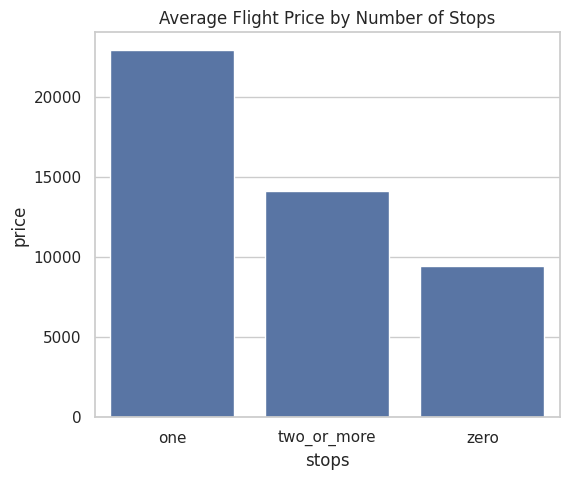

In [41]:
# 4. Average price by stops
plt.figure(figsize=(6, 5))
sns.barplot(data=af_cleaned, x='stops', y='price', errorbar=None)
plt.title("Average Flight Price by Number of Stops")
plt.show()

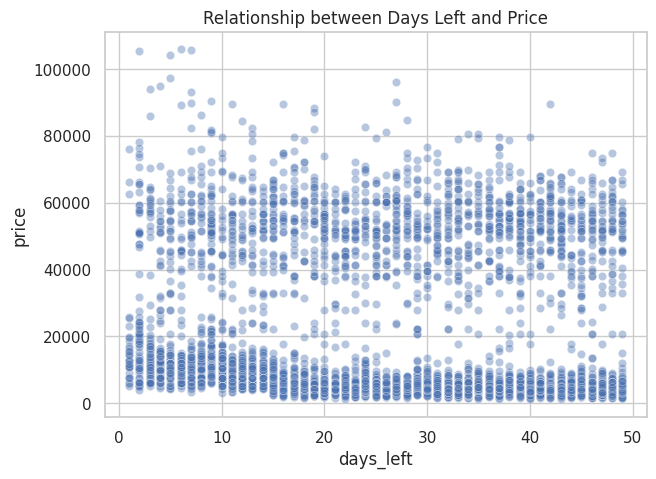

In [42]:
# 5. Relationship: days_left vs price
plt.figure(figsize=(7, 5))
sns.scatterplot(data=af_cleaned.sample(5000, random_state=42), x='days_left', y='price', alpha=0.4)
plt.title("Relationship between Days Left and Price")
plt.show()

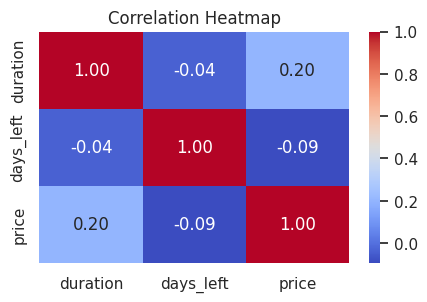

In [43]:
# 6. Correlation heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(af_cleaned[['duration', 'days_left', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Step 7: Feature Engineering & Encoding

In [45]:
# Copy dataset
af_encoded = af_cleaned.copy()

In [46]:
# Columns to encode
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class']

In [47]:
# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    af_encoded[col] = le.fit_transform(af_encoded[col])
af_encoded.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


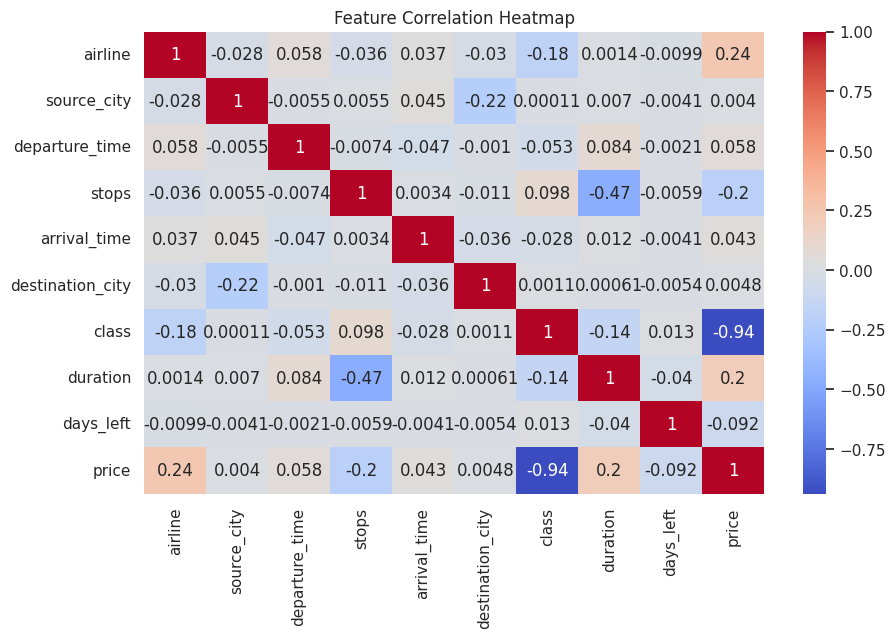

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(af_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
af_encoded.info()
af_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  int64  
 1   source_city       297940 non-null  int64  
 2   departure_time    297940 non-null  int64  
 3   stops             297940 non-null  int64  
 4   arrival_time      297940 non-null  int64  
 5   destination_city  297940 non-null  int64  
 6   class             297940 non-null  int64  
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 25.0 MB


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000,297940.000000
mean,3.099966,2.579385,2.418484,0.275112,3.069685,2.589585,0.687276,12.283063,26.004602,20976.448604
std,1.835809,1.751424,1.754818,0.655706,1.742869,1.744450,0.463604,7.176754,13.557190,22734.394635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.920000,15.000000,4792.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.330000,26.000000,7466.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


Step 8: Data Preparation for Modeling

In [50]:
# Separate features and target
X = af_encoded.drop(columns=['price'])
y = af_encoded['price']

In [51]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [53]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [55]:
X_train.shape

(238352, 9)

In [56]:
X_test.shape

(59588, 9)

In [58]:
# Initialize scaler
scaler = StandardScaler()

In [59]:
# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Convert back to DataFrame for clarity (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [61]:
X_train_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
298015,1.034052,-0.901282,-0.237925,-0.419916,0.532845,0.808482,-1.481561,0.540400,1.622764
283340,1.034052,0.240449,0.902410,-0.419916,-0.615371,0.808482,-1.481561,-0.552014,-1.179199
87620,0.489631,-1.472147,-0.808093,-0.419916,-0.041263,-0.337876,0.674964,0.969563,-0.515576
119731,1.034052,0.811314,0.902410,-0.419916,0.532845,-0.337876,0.674964,1.712237,-1.842821
34004,1.034052,-0.330417,0.902410,-0.419916,1.106953,0.235303,0.674964,-0.121458,1.032877


In [62]:
X_train_scaled.isnull().sum().any()

np.False_

In [63]:
y_train.isnull().sum().any()

np.False_

In [64]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
airline,238352.0,1.310327e-16,1.000002,-1.688057,-1.143635,-0.054791,1.034052,1.034052
source_city,238352.0,9.703366e-17,1.000002,-1.472147,-0.901282,-0.330417,0.811314,1.382180
departure_time,238352.0,-8.427470e-17,1.000002,-1.378260,-0.808093,-0.237925,0.902410,1.472577
stops,238352.0,6.138012e-17,1.000002,-0.419916,-0.419916,-0.419916,-0.419916,2.631823
arrival_time,238352.0,1.134817e-16,1.000002,-1.763586,-0.615371,0.532845,1.106953,1.106953
destination_city,238352.0,-7.427323e-17,1.000002,-1.484233,-0.911055,0.235303,0.808482,1.381661
class,238352.0,-1.229689e-16,1.000002,-1.481561,-1.481561,0.674964,0.674964,0.674964
duration,238352.0,3.376130e-16,1.000002,-1.597053,-0.748481,-0.133998,0.540400,4.940711
days_left,238352.0,4.860626e-17,1.000002,-1.842821,-0.810519,0.000575,0.885405,1.696500


Step 9 — Model Building & Evaluation

In [69]:
#2. Train and evaluate multiple models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(
        n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)),
    ("Gradient Boosting", GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

results = []

print("Training models...\n")
for name, model in models:
    t0 = time.time()
    model.fit(X_train_scaled, y_train)
    fit_time = time.time() - t0

    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    results.append({
        "Model": name,
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse,
        "Training Time (s)": round(fit_time, 2)
    })

    print(f"{name} — R²={r2:.4f} | MAE={mae:.2f} | RMSE={rmse:.2f} | Time={fit_time:.2f}s")


Training models...

Linear Regression — R²=0.9040 | MAE=4640.16 | RMSE=7021.97 | Time=0.05s
Random Forest — R²=0.9854 | MAE=1082.30 | RMSE=2735.37 | Time=62.47s
Gradient Boosting — R²=0.9515 | MAE=2988.12 | RMSE=4988.84 | Time=24.48s


In [71]:
#3. Model comparison table
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("\nModel Performance Comparison:")
display(results_df)


Model Performance Comparison:


,Model,R² Score,MAE,RMSE,Training Time (s)
1,Random Forest,0.985433,1082.303737,2735.373782,62.47
2,Gradient Boosting,0.951544,2988.117703,4988.842358,24.48
0,Linear Regression,0.904001,4640.161205,7021.969125,0.05


In [72]:
# ✅ 4. Identify best model
best_model_name = results_df.iloc[0]["Model"]
best_model = next(model for name, model in models if name == best_model_name)
print(f"\n Best model: {best_model_name}")


 Best model: Random Forest


In [73]:
#5. Diagnostic plots
y_pred_best = best_model.predict(X_test_scaled)

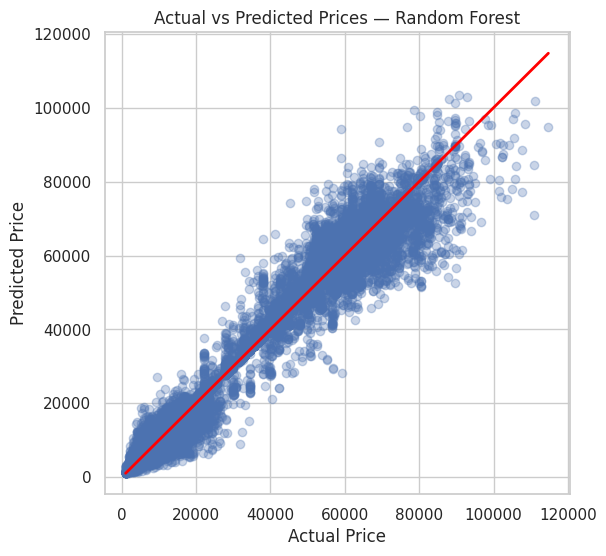

In [74]:
# Plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title(f"Actual vs Predicted Prices — {best_model_name}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

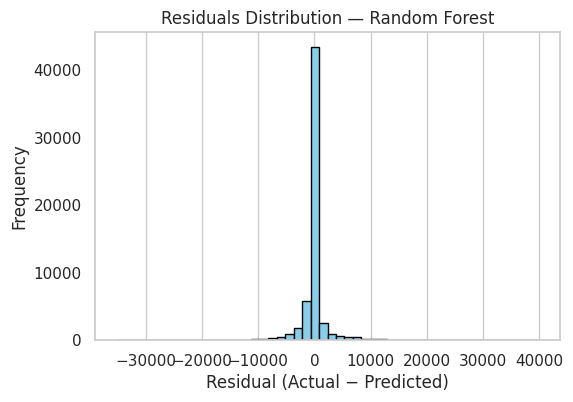

In [75]:
# Plot: Residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50, color="skyblue", edgecolor="black")
plt.title(f"Residuals Distribution — {best_model_name}")
plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()


 Top 10 Important Features:


,Feature,Importance
6,class,0.880635
7,duration,0.058627
8,days_left,0.018857
0,airline,0.010746
1,source_city,0.010602
5,destination_city,0.009784
4,arrival_time,0.004617
2,departure_time,0.004281
3,stops,0.001852


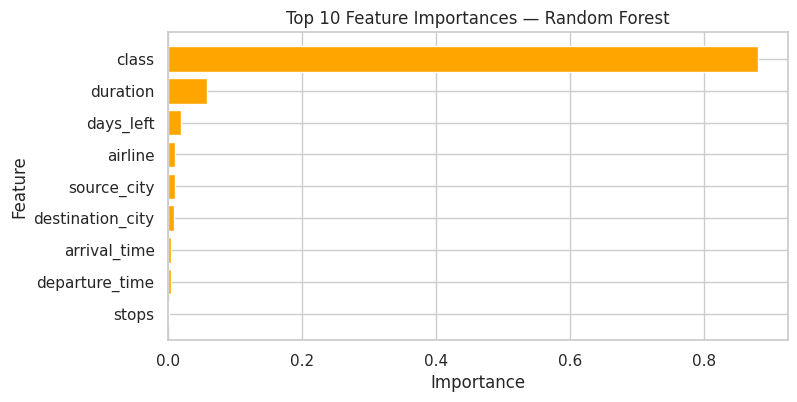

In [80]:
#6. Feature Importances (for tree models)
if hasattr(best_model, "feature_importances_"):
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    print("\n Top 10 Important Features:")
    display(feature_importances.head(10))

    plt.figure(figsize=(8,4))
    plt.barh(feature_importances.head(10)["Feature"][::-1],
             feature_importances.head(10)["Importance"][::-1],
             color="orange")
    plt.title(f"Top 10 Feature Importances — {best_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.grid(True, axis="x")
    plt.show()

In [82]:
#7. Print Final Metrics
print("\n Final Evaluation on Test Data:")
print(f"Best Model: {best_model_name}")
r2_final = r2_score(y_test, y_pred_best)
mae_final = mean_absolute_error(y_test, y_pred_best)
rmse_final = mean_squared_error(y_test, y_pred_best) ** 0.5
print(f"R² Score : {r2_final:.4f}")
print(f"MAE      : {mae_final:.2f}")
print(f"RMSE     : {rmse_final:.2f}")


 Final Evaluation on Test Data:
Best Model: Random Forest
R² Score : 0.9854
MAE      : 1082.30
RMSE     : 2735.37


Step 10 - Visualize Predictions

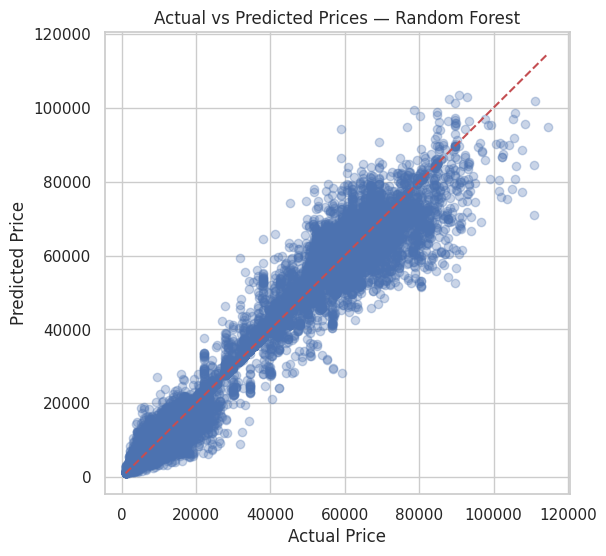

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices — {best_model_name}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [85]:
# Show first 10 actual prices vs predicted prices
comparison = pd.DataFrame({
    "Actual Price": y_test.values[:10],
    "Predicted Price": y_pred_best[:10]
})

print(" Sample of Actual vs Predicted Prices:")
display(comparison)


 Sample of Actual vs Predicted Prices:


,Actual Price,Predicted Price
0,24120,12381.10
1,54684,54684.00
2,41314,41314.00
3,44280,44337.12
4,60508,60508.00
5,60232,60550.08
6,45257,45257.00
7,18094,15585.54
8,14953,13358.09
9,16921,7544.55
